# Mushrooms challenge

Each autumn, in Catalonia, there is a big competition about mushroom hunting. Unfortunately, during the past years, a lot of people have picked poisonous mushrooms thinking that they were edible, causing an overload on the healthcare system.

The Department of Health has asked to develop a model that given basic image attributes of mushrooms we can detect if it is poisonous or not, and give a guidance if which are the features most indicative of a poisonous mushroom.

## 1.&nbsp;Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

## 2.&nbsp; Read in, manipulate and split data

In [ ]:
url = "https://drive.google.com/file/d/1skVvDuWE3CDpxeQVcuHxp31lRHa-v77M/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
mush = pd.read_csv(path)

In [ ]:
mush.head()

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0


In [ ]:
X = mush.drop(columns=["Id"]).copy()
y = X.pop("poisonous")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

X_train.head()

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population
1725,f,g,True,w,p,y
1260,f,g,True,g,g,v
4551,x,y,False,p,b,y
2442,f,c,False,w,n,v
6109,x,g,True,g,w,v


## 3.Install LazyPredict to see which are the best models to use

In [ ]:
#pip install lazypredict

In [ ]:
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

classifier = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = classifier.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:07<00:00,  3.62it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:07<00:00,  3.64it/s]

[LightGBM] [Info] Number of positive: 2518, number of negative: 2681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 5199, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484324 -> initscore=-0.062725
[LightGBM] [Info] Start training from score -0.062725


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreeClassifier,0.91,0.92,0.92,0.91,0.03
LGBMClassifier,0.91,0.91,0.91,0.91,0.15
BaggingClassifier,0.91,0.91,0.91,0.91,0.10
XGBClassifier,0.91,0.91,0.91,0.91,0.18
DecisionTreeClassifier,0.91,0.91,0.91,0.91,0.05
RandomForestClassifier,0.91,0.91,0.91,0.91,0.50
ExtraTreesClassifier,0.91,0.91,0.91,0.91,0.38
LabelPropagation,0.91,0.91,0.91,0.91,0.84
LabelSpreading,0.91,0.91,0.91,0.91,1.21


## 4.&nbsp; Create pipeline

### 4.1 ExtraTreesClassifier

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(handle_unknown="infrequent_if_exist"),
    ExtraTreesClassifier(n_estimators=200, random_state=123)
)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist')),
                ('extratreesclassifier',
                 ExtraTreesClassifier(n_estimators=200, random_state=123))])

In [ ]:
pipe.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_true=y_test, y_pred=pipe.predict(X_test))

0.9592307692307692

- Almost 96% Accuracy.
- That means, only 4 out of 100 mushrooms are wrongly labeled.
- "Wrongly labeled" can be two cases:
     - A poisonous mushroom got classified as non-poisonous or
     - a non-poisonous mushroom got classified as poisonous.

Let's plot the confusion matrix to see how well our model performed.

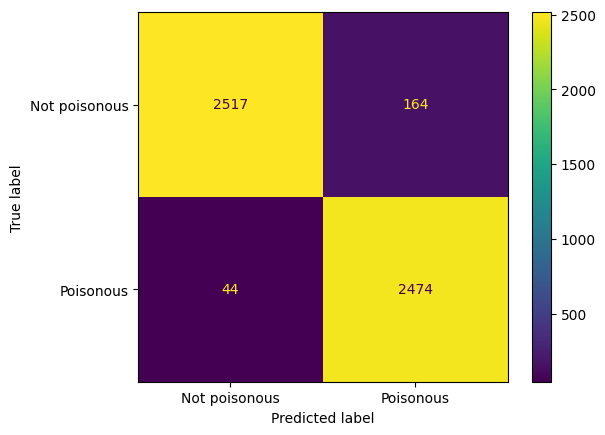

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train, display_labels=["Not poisonous", "Poisonous"]);

The confusion matrix shows that our model predicted 44 False Negatives. This means that 44 mushrooms will be predicted as non-poisonous (= Negatives) while in fact, they truly are poisonous (= False Negatives).

Our task is to avoid these situations at all costs, so we need to find a way to make that left-bottom corner of the confusion matrix to be equal to 0.

> Note: Judging from the values in the confusion matrix, the overall accuracy seems to be pretty high. As you can see from this example though, there are cases in which the accuracy doesn't seem to be the right metric to tell whether a model performs well (enough). This is why you'll need `recall`-measure for todays' competition:  

**Recall is the ability of the classifier to find all the positive samples.**

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_true=y_test, y_pred=pipe.predict(X_test))

0.9890453834115805

With a recall score of 1, no poisonous mushroom will be classified as non-poisonous (which means there are no false-negatives) --> no person will die.

### 4.2 Random Forest Classifier

In [ ]:
rf_pipe = make_pipeline(
    OneHotEncoder(handle_unknown="infrequent_if_exist"),
    RandomForestClassifier(n_estimators=500, random_state=123)
)

In [ ]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist')),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=500, random_state=123))])

In [ ]:
rf_pipe.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_true=y_test, y_pred=rf_pipe.predict(X_test))

0.9584615384615385

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_true=y_test, y_pred=rf_pipe.predict(X_test))

0.9874804381846636

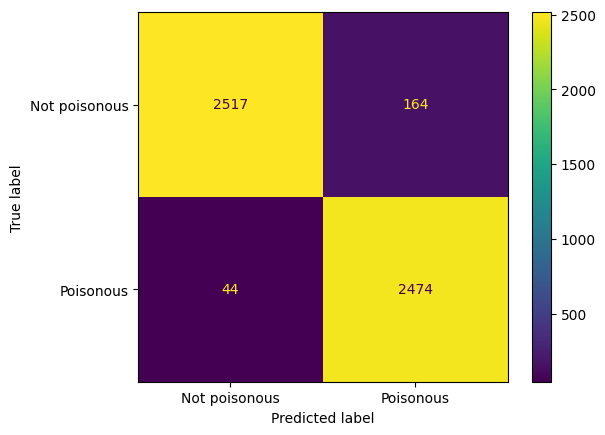

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_pipe, X_train, y_train, display_labels=["Not poisonous", "Poisonous"]);

### 4.3 KNN Classifier

In [ ]:
knn_pipe = make_pipeline(
    OneHotEncoder(handle_unknown="infrequent_if_exist"),
    KNeighborsClassifier(n_neighbors= 4)
)

In [ ]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist')),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])

In [ ]:
knn_pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_true=y_test, y_pred=knn_pipe.predict(X_test))

0.9638461538461538

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_true=y_test, y_pred=knn_pipe.predict(X_test))

0.97339593114241

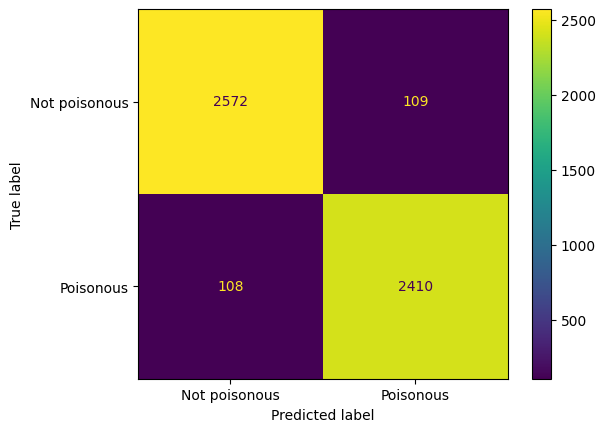

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_train, y_train, display_labels=["Not poisonous", "Poisonous"]);

### 4.4 XGB Classifier

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_pipe = make_pipeline(
    OneHotEncoder(handle_unknown="infrequent_if_exist"),
    XGBClassifier(n_estimators=500, random_state=123)
)

In [ ]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist')),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=None,
                               num_parallel_tree=None, random_state=123, ...))])

In [ ]:
xgb_pipe.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_true=y_test, y_pred=xgb_pipe.predict(X_test))

0.9584615384615385

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_true=y_test, y_pred=xgb_pipe.predict(X_test))

0.9874804381846636

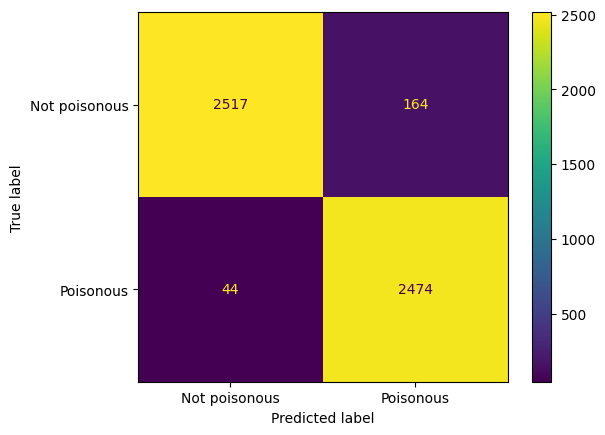

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_pipe, X_train, y_train, display_labels=["Not poisonous", "Poisonous"]);

### 4.5 LGBMClassifier

In [ ]:
pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

lgb_pipe = make_pipeline(
    OneHotEncoder(handle_unknown="infrequent_if_exist"),
    LGBMClassifier(random_state=123,force_col_wise= True)
)

In [ ]:
lgb_pipe.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2518, number of negative: 2681
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 5199, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484324 -> initscore=-0.062725
[LightGBM] [Info] Start training from score -0.062725


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist')),
                ('lgbmclassifier',
                 LGBMClassifier(force_col_wise=True, random_state=123))])

In [ ]:
lgb_pipe.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_true=y_test, y_pred=lgb_pipe.predict(X_test))

0.9584615384615385

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_true=y_test, y_pred=lgb_pipe.predict(X_test))

0.9874804381846636

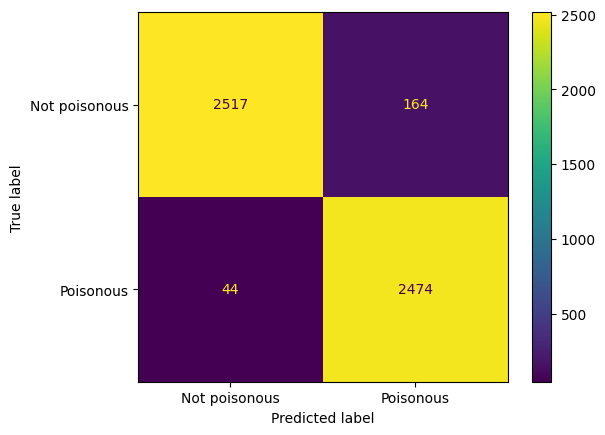

In [ ]:
ConfusionMatrixDisplay.from_estimator(lgb_pipe, X_train, y_train, display_labels=["Not poisonous", "Poisonous"]);

## 5.Use of predict_proba()

In [ ]:
et_proba = pipe.predict_proba(X_test)
pd.DataFrame(et_proba)

,0,1
0,0.48,0.52
1,1.00,0.00
2,1.00,0.00
3,0.00,1.00
4,0.00,1.00
...,...,...
1295,1.00,0.00
1296,0.00,1.00
1297,1.00,0.00
1298,1.00,0.00


In [ ]:
#rf_proba = rf_pipe.predict_proba(X_test)
#pd.DataFrame(rf_proba)

In [ ]:
#knn_proba = knn_pipe.predict_proba(X_test)
#pd.DataFrame(knn_proba)

In [ ]:
et_proba.shape

(1300,)

In [ ]:
et_proba=et_proba[:,1] ## all mushrooms to be poisoned

In [ ]:
et_proba

array([0.51685393, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, et_proba)

In [ ]:
thresholds

array([2.        , 1.        , 0.95918367, 0.90909091, 0.82352941,
       0.79104478, 0.70833333, 0.6875    , 0.66666667, 0.64705882,
       0.57142857, 0.56      , 0.55574627, 0.55555556, 0.51685393,
       0.445     , 0.32      , 0.28571429, 0.25      , 0.2345679 ,
       0.        ])

In [ ]:
fpr

array([0.        , 0.        , 0.00151286, 0.00302572, 0.00302572,
       0.00907716, 0.00907716, 0.01512859, 0.03479576, 0.03782148,
       0.03933434, 0.04538578, 0.04538578, 0.04689864, 0.06959153,
       0.06959153, 0.07110439, 0.09531014, 0.09984871, 0.11800303,
       1.        ])

In [ ]:
curve_df= pd.DataFrame({"fpr":fpr , "tpr":tpr, "thresholds": thresholds})

In [ ]:
curve_df

,fpr,tpr,thresholds
0,0.00,0.00,2.00
1,0.00,0.84,1.00
2,0.00,0.86,0.96
3,0.00,0.88,0.91
4,0.00,0.89,0.82
5,0.01,0.90,0.79
6,0.01,0.92,0.71
7,0.02,0.94,0.69
8,0.03,0.95,0.67
9,0.04,0.96,0.65


In [ ]:
test = pipe.predict_proba(X_test)

In [ ]:
test[:,1]

array([0.51685393, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [ ]:
adj_predict=(test[:,1]>= 0.28).astype("int")

In [ ]:
adj_predict

array([1, 0, 0, ..., 0, 0, 0])

## 9.Competition submission with unseen data

In [ ]:
# import data
url = "https://drive.google.com/file/d/1eWxV9FGj6D-YnMsv4mHMWRcGIKbjrXYL/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
new_data = pd.read_csv(path)

In [ ]:
# make sure it's in the same format
new_data.drop_duplicates(inplace=True)
id_col = new_data.pop("Id")

In [ ]:
# columns are in a different order, so let's change that
order_of_columns = X.columns.to_list()
new_data = new_data[order_of_columns]

In [ ]:
# predict values
poisonous_pred = pipe.predict(new_data)

In [ ]:
test = pipe.predict_proba(new_data)

In [ ]:
adj_predict_data=(test[:,1]>= 0.28).astype("int")

In [ ]:
adj_predict_data

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
# build the submission file
submission_file = pd.DataFrame({
    'Id':id_col,
    'poisonous':adj_predict_data
})

In [ ]:
submission_file.head()

,Id,poisonous
0,5165,1
1,4281,1
2,231,0
3,3890,0
4,1521,1


Download the submission file and upload it to the competition. Good luck!

In [ ]:
# # If you work locally:
# submission_file.to_csv('submission_1.csv',index=False)

In [ ]:
# If you work on colab:
# Remove the comments (#) below to run & download the file
#from google.colab import files
#submission_file.to_csv('submission_crew.csv',index=False)
#files.download('submission_crew.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>